<a href="https://www.kaggle.com/code/pasinduambawalage/shortcut-model-binary-batch-distillation?scriptVersionId=121662263" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing SciPy library to solve ODE
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

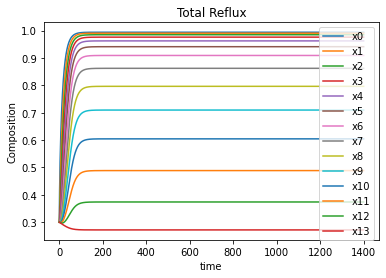

In [2]:
def odes_ss(x, t):
    #constants
    V = 0.25 #vapor boil-up rate
    MR = 47.4 #feed charged to the pot MR = 50 - 0.2*13 = 47.4
    MT = 0.2 #tray holdup
    MC = 0.2 #condenser reflux drum holdup 
    a = 1.6 #relative volatility of methanol - water  
    
    #define each ODE
    dXdt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    dXdt[0] = (a*x[1]/(1+(a-1)*x[1])-x[0])*V/MC
    
    for i in range(1,13):
        dXdt[i] = (a*x[i+1]/(1+(a-1)*x[i+1])-a*x[i]/(1+(a-1)*x[i])+x[i-1]-x[i])*V/MT
    
    dXdt[13] = (x[12]-a*x[13]/(1+(a-1)*x[13]))*V/MR
    
    return dXdt

#initial conditions 

x0 = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

#declare a time vector 
t = np.linspace(0,1400,10000)

#solving the set of differential equations
x = odeint(odes_ss,x0,t)


plt.plot(t,x[:,0])
plt.plot(t,x[:,1])
plt.plot(t,x[:,2])
plt.plot(t,x[:,3])
plt.plot(t,x[:,4])
plt.plot(t,x[:,5])
plt.plot(t,x[:,6])
plt.plot(t,x[:,7])
plt.plot(t,x[:,8])
plt.plot(t,x[:,9])
plt.plot(t,x[:,10])
plt.plot(t,x[:,11])
plt.plot(t,x[:,12])
plt.plot(t,x[:,13])
plt.legend(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13'])
plt.ylabel('Composition')
plt.xlabel('time')
plt.title('Total Reflux')
plt.savefig('x_totalreflux.png', format='png', dpi = 400)
plt.show()


In [3]:
# Define a steady state threshold
threshold = 1e-5

# Initialize a variable to store the current x13 value
x13 = x[:,13]
x13_prev = x13[0]

# Initialize a variable to store the number of consecutive iterations where x13 is within the threshold
count = 0

# Initialize a variable to store the time at which steady state is reached
t_steady = None

for i in range(1, len(t)):
    # Check if the difference between x13 and x13_prev is within the threshold
    if abs(x13[i] - x13_prev) < threshold:
        count += 1
    else:
        count = 0
    
    # If x13 has been within the threshold for 1000 consecutive iterations, set t_steady to the current time
    if count == 1000:
        t_steady = t[i-999]
        global t_index
        t_index = i-999
        break
    
    x13_prev = x13[i]
    

# Print the time at which steady state is reached
if t_steady:
    print("x13 reached steady state at t = {}".format(t_steady))
    print("t_index is = {}".format(t_index))
else:
    print("x13 did not reach steady state within the time range.")

    
#declaring global variables for the steady state liquid compositions and initial conditions for the constant reflux ratio mode 
global x_steady, x_in
x_steady = x[t_index,:]
print("x_steady = {}".format(x_steady))
x_in = [x_steady[0], x_steady[1], x_steady[2], x_steady[3], x_steady[4], x_steady[5], x_steady[6], x_steady[7], x_steady[8], x_steady[9], x_steady[10], x_steady[11], x_steady[12], x_steady[13], x_steady[0], 47.4, 0.00000001]


x13 reached steady state at t = 79.52795279527952
t_index is = 568
x_steady = [0.98949073 0.98362642 0.97489337 0.96197404 0.94303537 0.91565157
 0.87687632 0.82364912 0.75373713 0.66719487 0.56774415 0.46289115
 0.36198576 0.27306857]


[0.9894907279847652, 0.9836264188993955, 0.9748933663764673, 0.9619740443696732, 0.9430353667894662, 0.9156515727979401, 0.8768763213929238, 0.8236491228747083, 0.7537371268793785, 0.6671948697216576, 0.5677441536151582, 0.4628911529117839, 0.36198576150995493, 0.2730685653750068, 0.9894907279847652, 47.4, 1e-08]


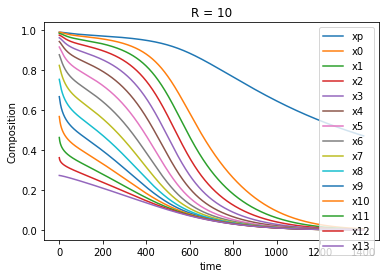

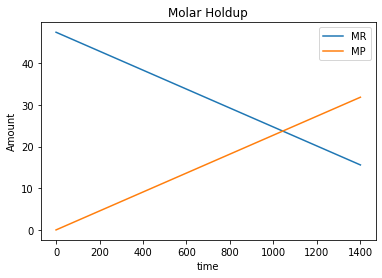

In [4]:

def odes_dyn (x_dyn,t):
    #constants
    V = 0.25 #vapor boil-up rate
    MT = 0.2 #tray holdup
    MC = 0.2 #condenser reflux drum holdup 
    a = 1.6 #relative volatility of methanol - water
    R = 10 #reflux ratio
    
    #basic equations for L and D
    L = R*V/(R+1)
    D = V/(R+1)
    
    #assign x_dyn elements to MR and MP for consistency 
    MR = x_dyn[15]
    MP = x_dyn[16]
    
    #define each ODE
        
    dX_dyndt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    dX_dyndt[0] = (a*x_dyn[1]/(1+(a-1)*x_dyn[1])-x_dyn[0])*V/MC
    
    for i in range (1,13):
        dX_dyndt[i] = (L*(x_dyn[i-1]-x_dyn[i])+V*(a*x_dyn[i+1]/(1+(a-1)*x_dyn[i+1])-a*x_dyn[i]/(1+(a-1)*x_dyn[i])))/MT
   
    dX_dyndt[13] = (L*x_dyn[12]+D*x_dyn[13]-V*(a*x_dyn[13]/(1+(a-1)*x_dyn[13])))/MR
    
    dX_dyndt[14] = (x_dyn[0]-x_dyn[14])*D/MP
    
    dX_dyndt[15] = -D
    
    dX_dyndt[16] = D
    
    return dX_dyndt

#declare a time vector 
x_in1 = x_in
print(format(x_in))
t = np.linspace(0,1400,10000)
x_dyn = odeint(odes_dyn, x_in1, t)

#defining MP,xp (product collection and composition) and MR,xr (reboiler holdup and composition)

global xp, xr, MP, MR
xp = x_dyn[:,14]
xr = x_dyn[:,13]
MP = x_dyn[:,16]
MR = x_dyn[:,15]

#plotting liquid compositions 
plt.plot(t,x_dyn[:,14])
plt.plot(t,x_dyn[:,0])
plt.plot(t,x_dyn[:,1])
plt.plot(t,x_dyn[:,2])
plt.plot(t,x_dyn[:,3])
plt.plot(t,x_dyn[:,4])
plt.plot(t,x_dyn[:,5])
plt.plot(t,x_dyn[:,6])
plt.plot(t,x_dyn[:,7])
plt.plot(t,x_dyn[:,8])
plt.plot(t,x_dyn[:,9])
plt.plot(t,x_dyn[:,10])
plt.plot(t,x_dyn[:,11])
plt.plot(t,x_dyn[:,12])
plt.plot(t,x_dyn[:,13])
plt.legend(['xp', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13'])
plt.ylabel('Composition')
plt.xlabel('time')
plt.title('R = 10')
plt.savefig('x_consntantreflux10.png', format='png', dpi = 400)
plt.show()

#plotting molar holdup in reboiler and product molar collection in product tank
plt.plot(t,x_dyn[:,15])
plt.plot(t,x_dyn[:,16])
plt.legend(['MR', 'MP'])
plt.ylabel('Amount')
plt.xlabel('time')
plt.title('Molar Holdup')
plt.savefig('Holdup_constantreflux6.png', format='png', dpi = 400)
plt.show()

In [5]:
#finding time to achieve x_p = 0.9 purity

# Initialize a variable to store the number of consecutive iterations where xp is greater than 0.9
count = 0

# Initialize a variable to store the time at which x_p is equal to 0.9
t_final = None

for i in range(1, len(t)):
    # Check if the difference between xp is greater than 0.9
    if xp[i] > 0.9:
        count = 0
    else:
        count = 1
    
    # if xp has reached 0.9, set t_final to the value in the previous step 
    if count == 1:
        t_final = t[i-1]
        global t_index
        t_final_index = i-1
        break
    
print("xp reached 0.9 at t = {}".format(t_final))
print("t_index is = {}".format(t_final_index))

#finding the yield

MP_final = MP[t_final_index]
xp_final = xp[t_final_index]

Yield = (MP_final*xp_final)/(0.3*50)*100

print("Final yield percentage is = {}".format(Yield))

xp reached 0.9 at t = 566.9166916691669
t_index is = 4049
Final yield percentage is = 77.31047673157885
